In [14]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="Workbook contains no default style")

file_path = "./data/xlsx/주택형태_및_점유형태_가구.xlsx"
df = pd.read_excel(file_path, skiprows=2)
df

,구분별(1),구분별(2),단독주택,아파트,연립/다세대,기타
0,연령대별,15~19세,41.9,13.8,18.4,25.9
1,NaN,20~29세,32.8,26.3,19.3,21.6
2,NaN,30~39세,16.0,60.4,14.8,8.9
3,NaN,40~49세,12.0,70.7,13.9,3.4
4,가구원수별,1인가구,33.1,36.2,19.5,11.2
5,NaN,2인가구,21.5,59.9,16.7,2.0


In [20]:
# '구분'과 '상태' 열 생성
df['구분'] = df['구분별(1)']
df['상태'] = df['구분별(2)']

# '구분' 열의 NaN 값을 ffill()로 채우기
df['구분'] = df['구분'].ffill()

# '상태' 열의 NaN 값을 ffill()로 채우기
df['상태'] = df['상태'].ffill()

house = df.pivot_table(
    index=['구분', '상태'], 
    values=['단독주택', '아파트', '연립/다세대', '기타' ], 
    aggfunc='first',
    observed=False
)
columns_order = [
    '단독주택', '아파트', '연립/다세대', '기타'
]
house = house[columns_order]
house

단독주택   아파트  연립/다세대    기타
구분    상태                              
가구원수별 1인가구    33.1  36.2    19.5  11.2
      2인가구    21.5  59.9    16.7   2.0
연령대별  15~19세  41.9  13.8    18.4  25.9
      20~29세  32.8  26.3    19.3  21.6
      30~39세  16.0  60.4    14.8   8.9
      40~49세  12.0  70.7    13.9   3.4

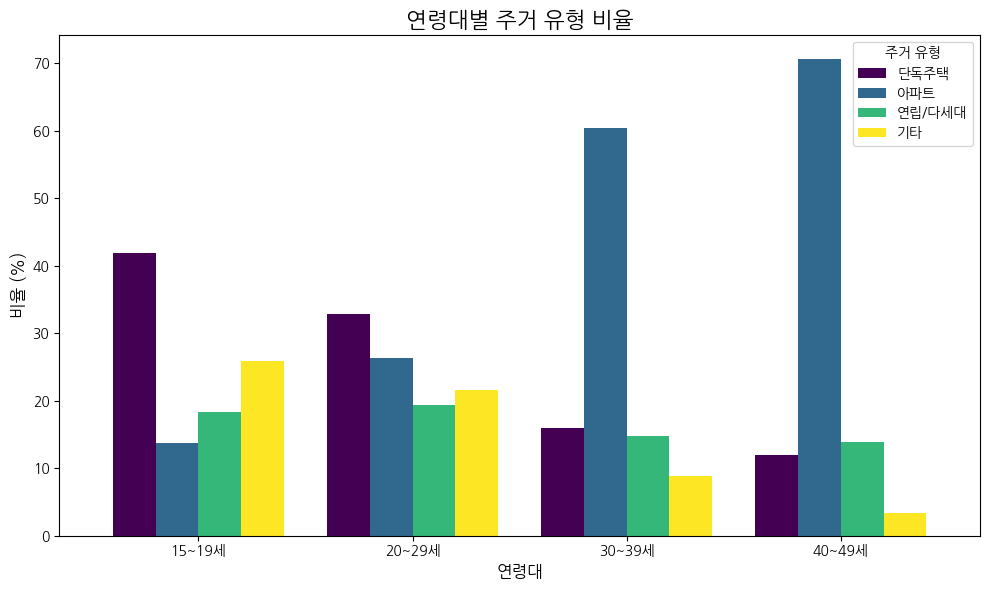

In [22]:
import matplotlib.pyplot as plt
import koreanize_matplotlib 
%matplotlib inline

# 연령대별 주거유형
age_group_data = house.loc['연령대별']
age_group_data.plot(
    kind='bar',
    figsize=(10, 6),
    width=0.8,
    colormap='viridis',
    rot=0
)

plt.title('연령대별 주거 유형 비율', fontsize=16)
plt.ylabel('비율 (%)', fontsize=12)
plt.xlabel('연령대', fontsize=12)
plt.legend(title='주거 유형', fontsize=10)
plt.tight_layout()
plt.show()


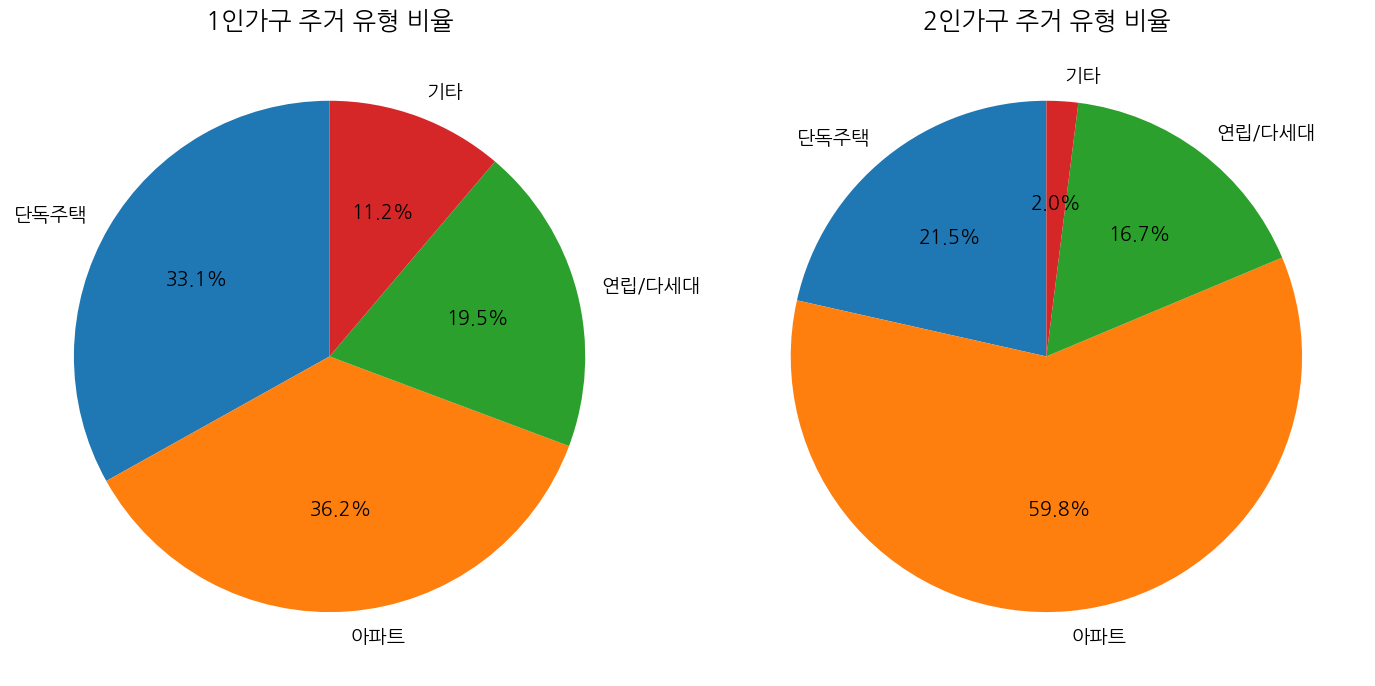

In [ ]:
# 가구원별 주거유형 
gagu_data = house.loc['가구원수별']
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

def plot_pie_chart(ax, data, title, fontsize=18, text_fontsize=14):
    data.plot.pie(
        autopct='%1.1f%%',  # 비율 표시
        startangle=90,      # 시작 각도
        ax=ax,              # 현재 서브플롯
        labels=data.index,  # 데이터 레이블
        textprops={'fontsize': text_fontsize}  
    )
    ax.set_title(title, fontsize=fontsize)
    ax.set_ylabel('')  
plot_pie_chart(ax[0], gagu_data.loc['1인가구'], '1인가구 주거 유형 비율')
plot_pie_chart(ax[1], gagu_data.loc['2인가구'], '2인가구 주거 유형 비율')
plt.tight_layout()
plt.show()